In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller, kpss 

In [2]:
df = pd.read_csv("PdM_errors.csv")


In [3]:
#ERROR_DATASET

In [4]:
print(df)
df.info()

                 datetime  machineID errorID
0     2015-01-03 07:00:00          1  error1
1     2015-01-03 20:00:00          1  error3
2     2015-01-04 06:00:00          1  error5
3     2015-01-10 15:00:00          1  error4
4     2015-01-22 10:00:00          1  error4
...                   ...        ...     ...
3914  2015-11-21 08:00:00        100  error2
3915  2015-12-04 02:00:00        100  error1
3916  2015-12-08 06:00:00        100  error2
3917  2015-12-08 06:00:00        100  error3
3918  2015-12-22 03:00:00        100  error3

[3919 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [5]:
df.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [6]:
df.isnull().sum()

datetime     0
machineID    0
errorID      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# df=df.sort_values(by='machineID')
df=df.sort_values(by='errorID')

In [9]:
df['datetime']=pd.to_datetime(df['datetime'])

In [10]:
df=df[df['datetime'].dt.year!=2016]
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['errorID_encoded']= label_encoder.fit_transform(df['errorID'])
df['errorID_encoded']+=1
df['errorID'].unique()
df.head()

,datetime,machineID,errorID,errorID_encoded
0,2015-01-03 07:00:00,1,error1,1
1256,2015-04-15 19:00:00,33,error1,1
3054,2015-11-09 00:00:00,79,error1,1
1252,2015-02-27 04:00:00,33,error1,1
1250,2015-01-30 06:00:00,33,error1,1


C:\Users\AKUMRA\AppData\Local\Temp\ipykernel_21060\979243234.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

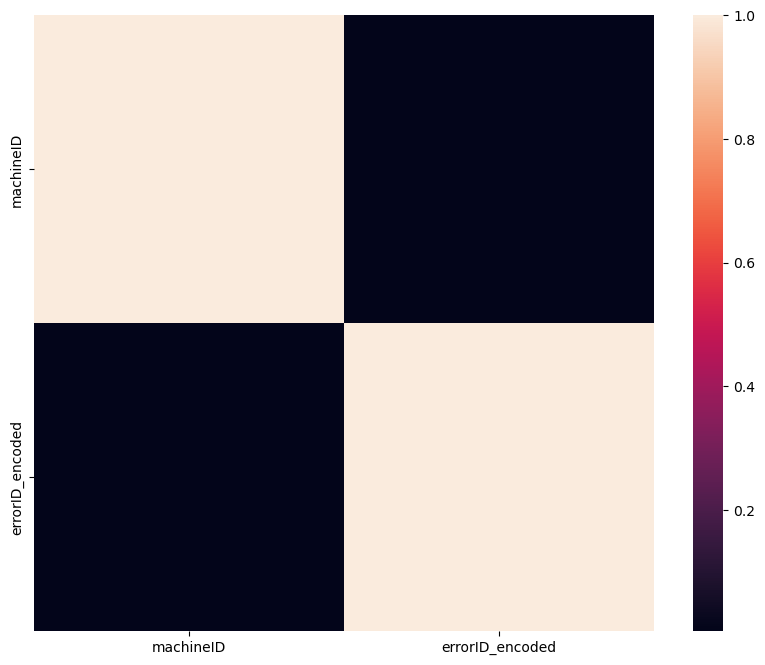

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

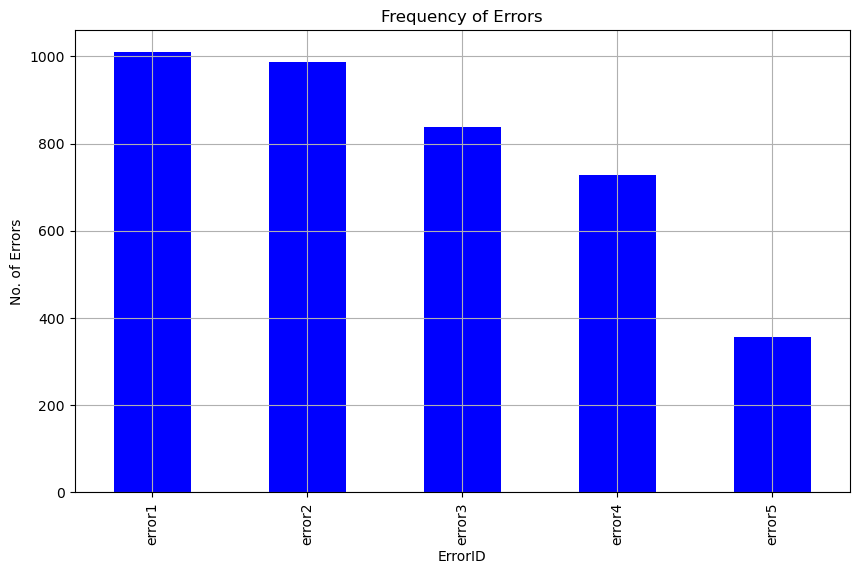

In [13]:
#overall variation of pressure for the entire year
# df['errorID_encoded'].plot(kind='bar',color='blue')
errors = df.groupby('errorID')['errorID_encoded'].size()
plt.figure(figsize=(10, 6))
errors.plot(kind='bar', color='blue')
errors.plot(kind='bar', color='blue')
plt.title('Frequency of Errors')
plt.xlabel('ErrorID')
plt.ylabel('No. of Errors')
plt.grid(True)

plt.show()

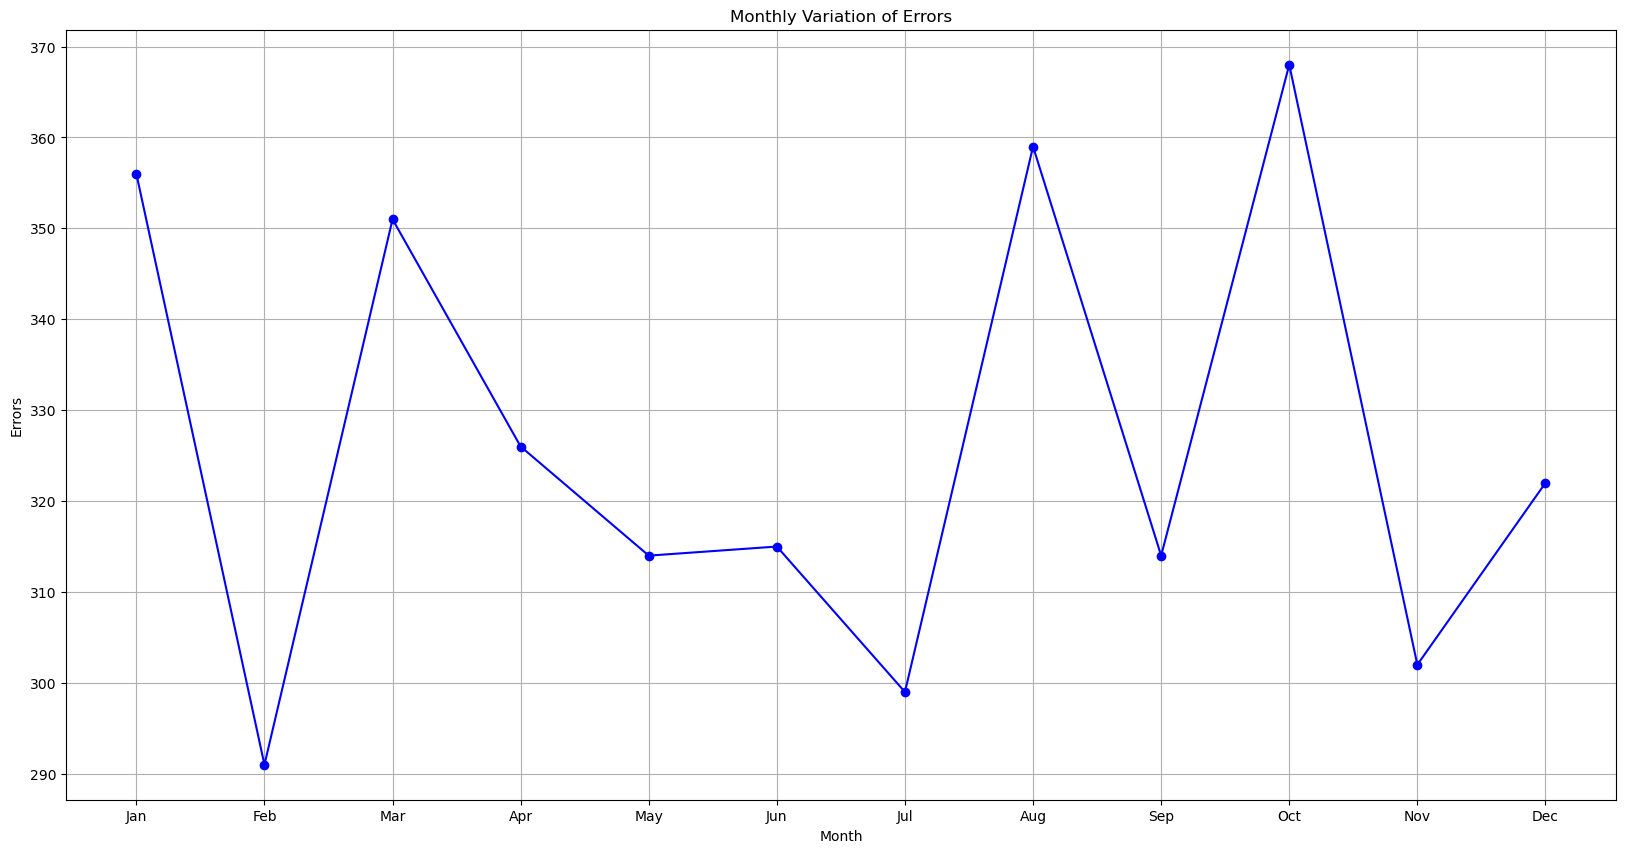

In [14]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['month'] = df['datetime'].dt.month

monthly_errors = df.groupby('month')['errorID_encoded'].size()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


plt.figure(figsize=(20, 10))
plt.plot(monthly_errors.index, monthly_errors.values, color='blue', marker='o')

plt.title('Monthly Variation of Errors')
plt.xlabel('Month')
plt.ylabel('Errors')
plt.xticks(monthly_errors.index, month_names)
plt.grid(True)

plt.show()

In [16]:
#variation of pressure wrt each day 
df['datetime'] = pd.to_datetime(df['datetime'])

df['day'] = df['datetime'].dt.day

daily_errors = df.groupby('day')['errorID_encoded'].sum()

plt.figure(figsize=(10, 6))
daily_errors.plot(kind='bar', color='blue')
plt.title('Daily Variation of Errors')
plt.xlabel('Day')
plt.ylabel('Errors')
# plt.grid(True)
plt.show()

KeyError: 'Column not found: failure_encoded'

<Axes: xlabel='machineID'>

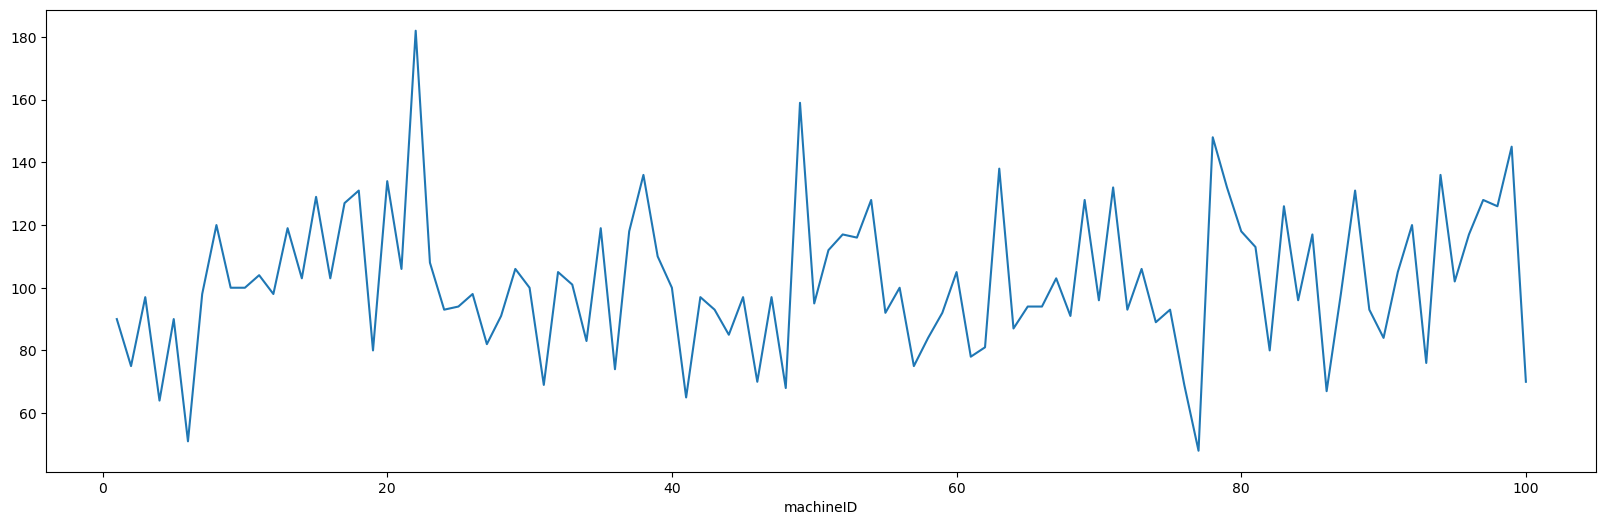

In [15]:
avg_errors = df.groupby('machineID')['errorID_encoded'].sum()
plt.figure(figsize=(20,6))
avg_errors.plot(kind='line')

In [16]:
df1=pd.read_csv("PdM_machines.csv")

In [17]:
df2=pd.merge(df,df1)

In [18]:
print(df2)

                datetime  machineID errorID  errorID_encoded  month  day  \
0    2015-01-03 07:00:00          1  error1                1      1    3   
1    2015-01-27 04:00:00          1  error1                1      1   27   
2    2015-03-05 06:00:00          1  error1                1      3    5   
3    2015-03-20 18:00:00          1  error1                1      3   20   
4    2015-03-31 23:00:00          1  error1                1      3   31   
...                  ...        ...     ...              ...    ...  ...   
3912 2015-08-06 14:00:00         89  error4                4      8    6   
3913 2015-11-01 11:00:00         89  error5                5     11    1   
3914 2015-08-02 12:00:00         89  error5                5      8    2   
3915 2015-03-23 06:00:00         89  error5                5      3   23   
3916 2015-05-22 06:00:00         89  error5                5      5   22   

       model  age  
0     model3   18  
1     model3   18  
2     model3   18  
3     m

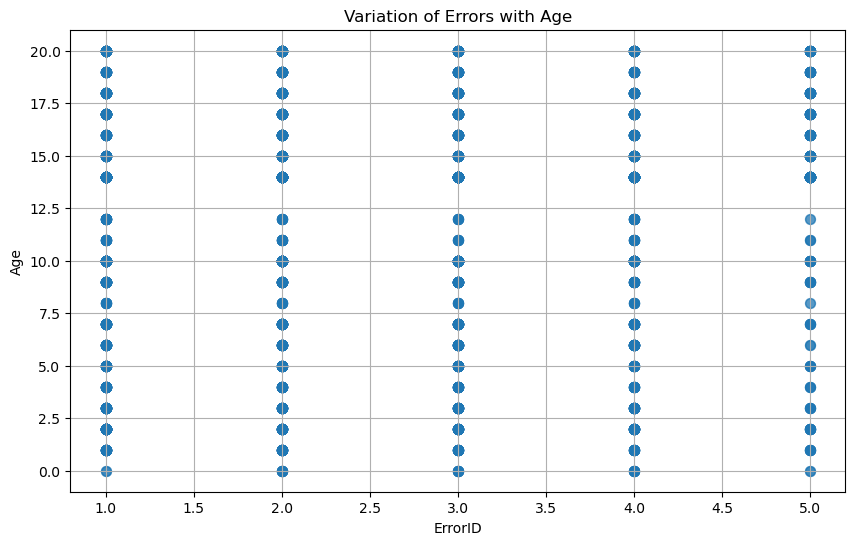

In [19]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['errorID_encoded'], df2['age'], s=50, alpha=0.5)

# Customize the plot
plt.title('Variation of Errors with Age')
plt.xlabel('ErrorID')
plt.ylabel('Age')
plt.grid(True)

# Show the plot
plt.show()

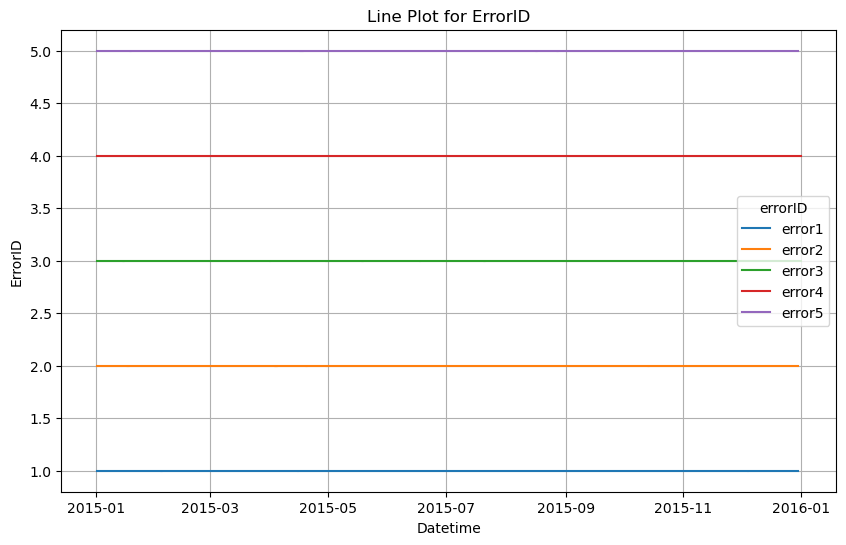

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='datetime', y='errorID_encoded', hue='errorID')

plt.title('Line Plot for ErrorID')
plt.xlabel('Datetime')
plt.ylabel('ErrorID')
plt.grid(True)

plt.show()

In [21]:
df3=pd.read_csv("PdM_maint.csv")

In [22]:
print(df3)
# mer=pd.merge(df3,df2)

                 datetime  machineID   comp
0     2014-06-01 06:00:00          1  comp2
1     2014-07-16 06:00:00          1  comp4
2     2014-07-31 06:00:00          1  comp3
3     2014-12-13 06:00:00          1  comp1
4     2015-01-05 06:00:00          1  comp4
...                   ...        ...    ...
3281  2015-10-10 06:00:00        100  comp3
3282  2015-10-25 06:00:00        100  comp4
3283  2015-11-09 06:00:00        100  comp4
3284  2015-12-09 06:00:00        100  comp2
3285  2015-12-24 06:00:00        100  comp2

[3286 rows x 3 columns]


In [23]:
print(df2)

                datetime  machineID errorID  errorID_encoded  month  day  \
0    2015-01-03 07:00:00          1  error1                1      1    3   
1    2015-01-27 04:00:00          1  error1                1      1   27   
2    2015-03-05 06:00:00          1  error1                1      3    5   
3    2015-03-20 18:00:00          1  error1                1      3   20   
4    2015-03-31 23:00:00          1  error1                1      3   31   
...                  ...        ...     ...              ...    ...  ...   
3912 2015-08-06 14:00:00         89  error4                4      8    6   
3913 2015-11-01 11:00:00         89  error5                5     11    1   
3914 2015-08-02 12:00:00         89  error5                5      8    2   
3915 2015-03-23 06:00:00         89  error5                5      3   23   
3916 2015-05-22 06:00:00         89  error5                5      5   22   

       model  age  
0     model3   18  
1     model3   18  
2     model3   18  
3     m

In [24]:
df4=pd.read_csv("PdM_telemetry.csv")

In [25]:
df4['datetime']=pd.to_datetime(df4['datetime'])
print(df4)

                  datetime  machineID        volt      rotate    pressure  \
0      2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1      2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2      2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3      2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4      2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
...                    ...        ...         ...         ...         ...   
876095 2016-01-01 02:00:00        100  179.438162  395.222827  102.290715   
876096 2016-01-01 03:00:00        100  189.617555  446.207972   98.180607   
876097 2016-01-01 04:00:00        100  192.483414  447.816524   94.132837   
876098 2016-01-01 05:00:00        100  165.475310  413.771670  104.081073   
876099 2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

        vibration  
0       45.087686  
1       43.413973  
2       34.1788

In [26]:
mer=pd.merge(df2,df4)

In [27]:
print(mer)

                datetime  machineID errorID  errorID_encoded  month  day  \
0    2015-01-03 07:00:00          1  error1                1      1    3   
1    2015-01-27 04:00:00          1  error1                1      1   27   
2    2015-03-05 06:00:00          1  error1                1      3    5   
3    2015-03-20 18:00:00          1  error1                1      3   20   
4    2015-03-31 23:00:00          1  error1                1      3   31   
...                  ...        ...     ...              ...    ...  ...   
3912 2015-08-06 14:00:00         89  error4                4      8    6   
3913 2015-11-01 11:00:00         89  error5                5     11    1   
3914 2015-08-02 12:00:00         89  error5                5      8    2   
3915 2015-03-23 06:00:00         89  error5                5      3   23   
3916 2015-05-22 06:00:00         89  error5                5      5   22   

       model  age        volt      rotate    pressure  vibration  
0     model3   18  1

C:\Users\AKUMRA\AppData\Local\Temp\ipykernel_25080\4167721109.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mer.corr())
C:\Users\AKUMRA\AppData\Local\Temp\ipykernel_25080\4167721109.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(mer.corr())


                 machineID  errorID_encoded     month       day       age  \
machineID         1.000000         0.003994 -0.003805 -0.000838  0.097530   
errorID_encoded   0.003994         1.000000  0.005847  0.055409  0.107836   
month            -0.003805         0.005847  1.000000  0.016648 -0.019971   
day              -0.000838         0.055409  0.016648  1.000000  0.012096   
age               0.097530         0.107836 -0.019971  0.012096  1.000000   
volt             -0.023614        -0.057232  0.000769  0.009589  0.020033   
rotate            0.002980        -0.011907 -0.030449  0.006892  0.026612   
pressure          0.002718         0.059554  0.009704 -0.014787  0.000614   
vibration         0.038730         0.141431 -0.007834 -0.018952  0.121755   

                     volt    rotate  pressure  vibration  
machineID       -0.023614  0.002980  0.002718   0.038730  
errorID_encoded -0.057232 -0.011907  0.059554   0.141431  
month            0.000769 -0.030449  0.009704  -0.00

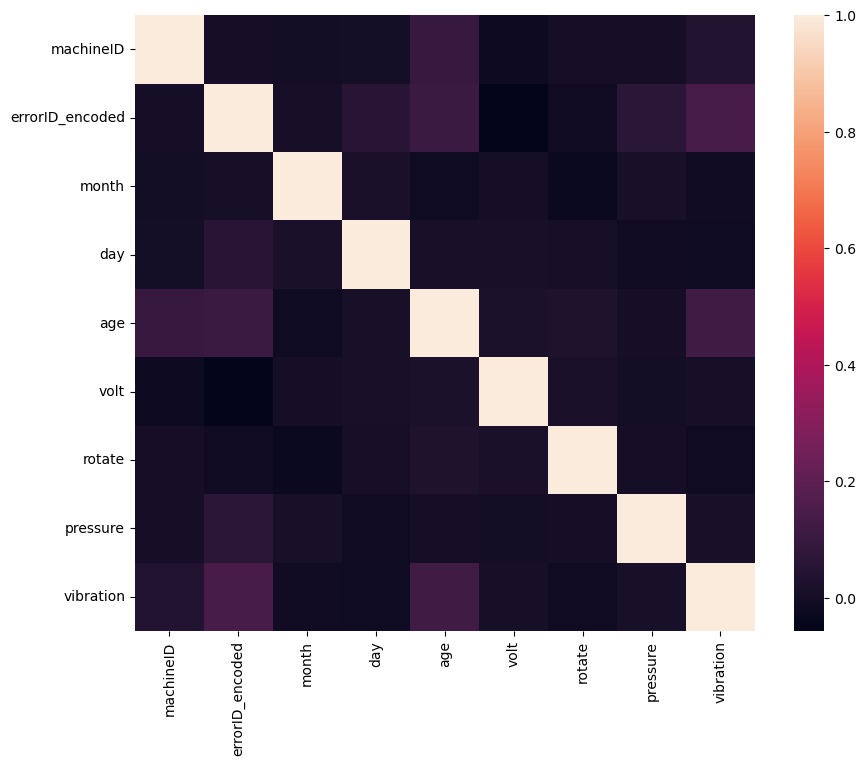

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(mer.corr())
print(mer.corr())

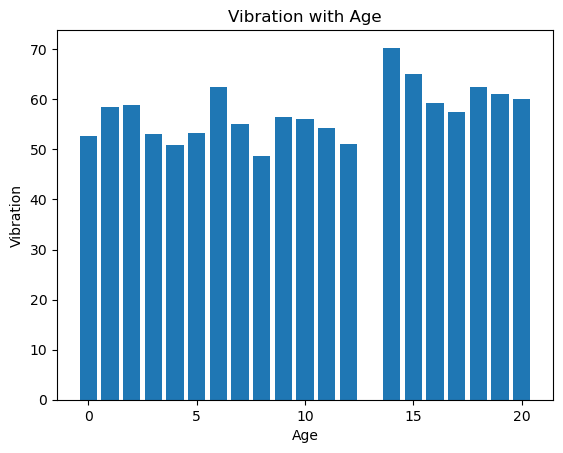

In [29]:
fig, ax = plt.subplots()
plt.bar(mer["age"],mer["vibration"])
ax.set_ylabel('Vibration')
ax.set_xlabel('Age')
ax.set_title('Vibration with Age')
plt.show()

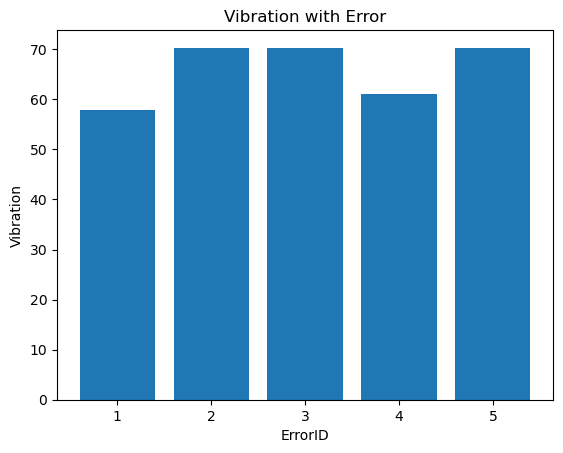

In [30]:
fig, ax = plt.subplots()
plt.bar(mer["errorID_encoded"],mer["vibration"])
ax.set_ylabel('Vibration')
ax.set_xlabel('ErrorID')
ax.set_title('Vibration with Error')
plt.show()

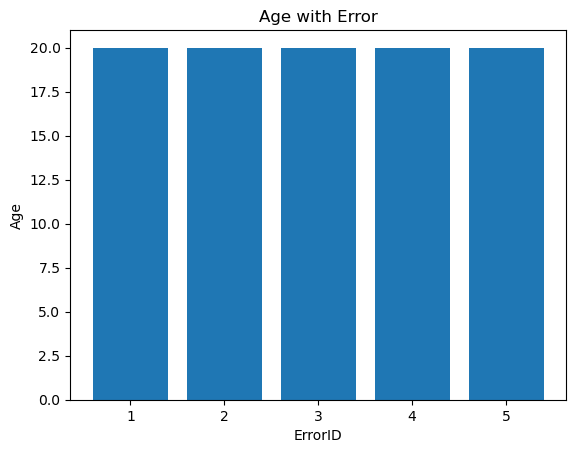

In [31]:
fig, ax = plt.subplots()
plt.bar(mer["errorID_encoded"],mer["age"])
ax.set_ylabel('Age')
ax.set_xlabel('ErrorID')
ax.set_title('Age with Error')
plt.show()

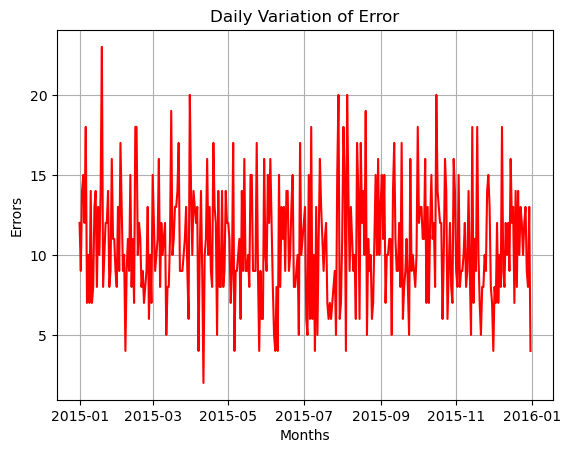

<Figure size 2000x1000 with 0 Axes>

In [32]:
mer['date'] = mer['datetime'].dt.date
# date=df.groupby('datetime')['volt'].sum()
error=mer.groupby('date')['errorID_encoded'].size()
plt.plot(error.index, error.values, color='red')
# axis_position = plt.axes([0.2, 0.1, 0.65, 0.03],)
# slider_position = Slider(axis_position,'Pos', 0.1, 90.0)
# def update(val):
#     pos = slider_position.val
#     Axis.axis([pos, pos+1, 0, 1])
#     Plot.canvas.draw_idle()
 
plt.title('Daily Variation of Error')
plt.xlabel('Months')
plt.ylabel('Errors')

# plt.xticks(monthly_pressure.index, month_names)
plt.grid(True)
plt.plot()
plt.figure(figsize=(20, 10))
# slider_position.on_changed(update)
plt.show()

In [15]:
mer['datetime'] = pd.to_datetime(df['datetime'])

mer['month'] = mer['datetime'].dt.month

monthly_errors = mer.groupby('month')['datetime'].size()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


plt.figure(figsize=(20, 10))
plt.plot(monthly_errors.index, monthly_errors.values, color='blue', marker='o')

plt.title('Monthly Variation of Errors')
plt.xlabel('Month')
plt.ylabel('Errors')
plt.xticks(monthly_errors.index, month_names)
plt.grid(True)

plt.show()

NameError: name 'mer' is not defined